# IBTrACS

This tutorial explores the International Best Track Archive for Climate Stewardship (IBTrACS) dataset, which provides global tropical cyclone data. The dataset is available in multiple formats, including CSV, shapefiles, and NetCDF, which we will explore in this notebook.

We will cover the following:
- How to load and analyze IBTrACS data in CSV format.
- How to work with shapefiles to visualize cyclone paths.
- How to leverage the NetCDF format for more advanced analyses.


In [1]:
import pandas as pd
from IPython.display import display
import folium
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import requests
import zipfile

## CSV Data

In this section, we will load IBTrACS data in CSV format. The CSV format is straightforward and ideal for those who are familiar with tabular data. We will explore basic operations, such as loading the data into a DataFrame, filtering specific columns, and performing simple analyses.

### Steps:
1. Load the CSV file using Pandas.
2. Inspect the data to understand its structure and content.
3. Filter and analyze specific columns, such as storm names, dates, and locations.


In [2]:
#point to IBTrACS URL
url = "https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r01/access/csv/ibtracs.ALL.list.v04r01.csv"

In [3]:
#Load the IBTrACS CSV data into a DataFrame and display the first few rows to get an overview of the data.
ibtracs_data = pd.read_csv(url)

ibtracs_data.head()

/var/folders/3n/pbnqdsys6ks6vhbbbd4j1ftwfpsfpx/T/ipykernel_13686/1741897454.py:2: DtypeWarning: Columns (1,2,8,9,14,19,20,172,173) have mixed types. Specify dtype option on import or set low_memory=False.
  ibtracs_data = pd.read_csv(url)


,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,BOM_GUST_PER,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR
0,,Year,,,,,,,degrees_north,degrees_east,...,second,kts,second,ft,nmile,nmile,nmile,nmile,kts,degrees
1,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 03:00:00,NR,10.9,80.3,...,,,,,,,,,9,265
2,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 06:00:00,NR,10.9,79.8,...,,,,,,,,,9,265
3,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 09:00:00,NR,10.8,79.4,...,,,,,,,,,9,265
4,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 12:00:00,NR,10.8,78.9,...,,,,,,,,,9,265


## Exploring the Data
Before diving deeper, let's explore the structure of the dataset. We’ll start by listing all the column names to understand what data is available.


In [5]:
#create a list of columns to a list
column_list = ibtracs_data.columns.tolist()
print(column_list)

['SID', 'SEASON', 'NUMBER', 'BASIN', 'SUBBASIN', 'NAME', 'ISO_TIME', 'NATURE', 'LAT', 'LON', 'WMO_WIND', 'WMO_PRES', 'WMO_AGENCY', 'TRACK_TYPE', 'DIST2LAND', 'LANDFALL', 'IFLAG', 'USA_AGENCY', 'USA_ATCF_ID', 'USA_LAT', 'USA_LON', 'USA_RECORD', 'USA_STATUS', 'USA_WIND', 'USA_PRES', 'USA_SSHS', 'USA_R34_NE', 'USA_R34_SE', 'USA_R34_SW', 'USA_R34_NW', 'USA_R50_NE', 'USA_R50_SE', 'USA_R50_SW', 'USA_R50_NW', 'USA_R64_NE', 'USA_R64_SE', 'USA_R64_SW', 'USA_R64_NW', 'USA_POCI', 'USA_ROCI', 'USA_RMW', 'USA_EYE', 'TOKYO_LAT', 'TOKYO_LON', 'TOKYO_GRADE', 'TOKYO_WIND', 'TOKYO_PRES', 'TOKYO_R50_DIR', 'TOKYO_R50_LONG', 'TOKYO_R50_SHORT', 'TOKYO_R30_DIR', 'TOKYO_R30_LONG', 'TOKYO_R30_SHORT', 'TOKYO_LAND', 'CMA_LAT', 'CMA_LON', 'CMA_CAT', 'CMA_WIND', 'CMA_PRES', 'HKO_LAT', 'HKO_LON', 'HKO_CAT', 'HKO_WIND', 'HKO_PRES', 'KMA_LAT', 'KMA_LON', 'KMA_CAT', 'KMA_WIND', 'KMA_PRES', 'KMA_R50_DIR', 'KMA_R50_LONG', 'KMA_R50_SHORT', 'KMA_R30_DIR', 'KMA_R30_LONG', 'KMA_R30_SHORT', 'NEWDELHI_LAT', 'NEWDELHI_LON', 'N

## Filtering the Dataset
In this section, we’ll explore how to filter the dataset based on different criteria, such as a specific season or storm. This can be useful when you want to analyze a subset of the data.

### Filtering by Season
Let’s start by filtering the dataset to include only storms from the 2005 season.


In [6]:
#Often we want to filter this dataset by different criteria. Here we do it by
ibtracs_2005=ibtracs_data[ibtracs_data['SEASON'] == 2005]
ibtracs_2005.head(5)

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,BOM_GUST_PER,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR
590760,2004243S03088,2005,64,SI,MM,PHOEBE,2004-08-30 06:00:00,TS,-2.8,87.7,...,40,,,,,,,,3,160
590761,2004243S03088,2005,64,SI,MM,PHOEBE,2004-08-30 09:00:00,TS,-3.0,87.8,...,,,,,,,,,3,165
590762,2004243S03088,2005,64,SI,MM,PHOEBE,2004-08-30 12:00:00,TS,-3.1,87.8,...,40,,,,,,,,3,175
590763,2004243S03088,2005,64,SI,MM,PHOEBE,2004-08-30 15:00:00,TS,-3.2,87.8,...,,,,,,,,,3,0
590764,2004243S03088,2005,64,SI,MM,PHOEBE,2004-08-30 18:00:00,TS,-3.4,87.8,...,45,,,,,,,,3,175


### Filtering by Storm Name or SID
Next, we’ll filter the data to retrieve information about a specific storm. Here, we use the storm name "PHOEBE."


In [7]:
#get data for a specific storm.  You can use either the name or the SID.
ibtracs_phoebe=ibtracs_data[ibtracs_data['NAME'] == 'PHOEBE']
ibtracs_phoebe.head(5)

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,BOM_GUST_PER,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR
590760,2004243S03088,2005,64,SI,MM,PHOEBE,2004-08-30 06:00:00,TS,-2.8,87.7,...,40,,,,,,,,3,160
590761,2004243S03088,2005,64,SI,MM,PHOEBE,2004-08-30 09:00:00,TS,-3.0,87.8,...,,,,,,,,,3,165
590762,2004243S03088,2005,64,SI,MM,PHOEBE,2004-08-30 12:00:00,TS,-3.1,87.8,...,40,,,,,,,,3,175
590763,2004243S03088,2005,64,SI,MM,PHOEBE,2004-08-30 15:00:00,TS,-3.2,87.8,...,,,,,,,,,3,0
590764,2004243S03088,2005,64,SI,MM,PHOEBE,2004-08-30 18:00:00,TS,-3.4,87.8,...,45,,,,,,,,3,175


### Subsetting Data for Specific Variables
Finally, we’ll create a subset of the data that includes only the latitude (LAT), longitude (LON), and storm speed (STORM_SPEED) for the storm "PHOEBE."


In [8]:
#subset data on LAT, LON, and Storm Speed for Phoebe
phoebe_subset = ibtracs_phoebe[['LAT', 'LON', 'STORM_SPEED']]
phoebe_subset.head(5)

,LAT,LON,STORM_SPEED
590760,-2.8,87.7,3
590761,-3.0,87.8,3
590762,-3.1,87.8,3
590763,-3.2,87.8,3
590764,-3.4,87.8,3


## Wrapping Up the CSV Data Exploration

In this section, we explored how to filter and subset the IBTrACS dataset using basic criteria like season and storm name. These techniques allow you to narrow down your analysis to specific storms or time periods, making it easier to extract meaningful insights from the data.

### Moving Forward: Integrating Spatial Data with Shapefiles

Next, we'll dive into working with shapefiles, a common format for spatial data in geographic information systems (GIS). Shapefiles are essential when you want to visualize storm tracks on a map or analyze how storms interact with specific geographic regions. Let's get started!


## Shapefiles

Shapefiles are a common format for geographic data. In this section, we will use Geopandas to load and analyze shapefiles containing tropical cyclone paths. This allows us to visualize cyclone tracks on a map, providing a spatial understanding of the data. Shape files consist of geometric features like points, lines, and polygons that represent real-world objects such as cities, roads, or boundaries.

**Why Use Shapefiles?**

Shapefiles allow you to visualize and analyze geographic data spatially. For instance, in the context of tropical cyclones, they can represent the paths of storms, enabling you to:

- **Visualize Data:** See the spatial distribution of cyclone tracks on a map.
- **Perform Spatial Analysis:** Analyze relationships between storm paths and other geographic features, like coastlines or population centers.
- **Integrate with Other Data:** Overlay cyclone paths with other maps (e.g., population, infrastructure) for more comprehensive analysis.

In this section, we’ll use Geopandas to load cyclone path shapefiles and visualize them on a map. Check the readme in this tutorial for notes on installing geopandas

### Steps:
1. Load the shapefiles using Geopandas.
2. Plot the cyclone tracks on a map to visualize their paths.
3. Explore the relationship between storm intensity and geography.


### Downloading Shapefile Data

In this step, we download the zipped shapefile containing the cyclone tracks from an online source. We will use the `requests` library to handle the HTTP request. The shapefile is provided by the NOAA's International Best Track Archive for Climate Stewardship (IBTrACS).

Downloading files programmatically can be particularly useful when working with large datasets or when you need to automate data retrieval. Here, we demonstrate how to download the shapefile and handle potential errors gracefully.


In [10]:
# URL to the zipped shapefile
url = 'https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r01/access/shapefile/IBTrACS.ALL.list.v04r01.lines.zip'

# Try to download the file and handle potential errors
try:
    response = requests.get(url, timeout=10)
    response.raise_for_status()  # This will raise an HTTPError if the request was unsuccessful
    zip_file_content = response.content
    print("File downloaded successfully.")

    # Check the content's metadata
    print(response.headers)

except requests.exceptions.HTTPError as err:
    print(f"HTTP error occurred: {err}")



File downloaded successfully.
{'Date': 'Fri, 23 Aug 2024 23:44:43 GMT', 'Server': 'Apache', 'Strict-Transport-Security': 'max-age=31536000', 'Last-Modified': 'Thu, 22 Aug 2024 10:18:27 GMT', 'ETag': '"2ca46cd-62042facb6cec"', 'Accept-Ranges': 'bytes', 'Content-Length': '46810829', 'Content-Type': 'application/zip', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Headers': 'X-Requested-With, Content-Type', 'Connection': 'close'}


### Checking the Downloaded File's Metadata

After successfully downloading the shapefile, it's important to verify what we have received. The `response.headers` attribute provides metadata about the downloaded file, such as its content type, size, and other HTTP headers. This information can be useful to confirm that the download was successful and that the file is in the expected format.


In [ ]:
# Check the content's metadata
if zip_file_content:
    print(response.headers)


### Understanding the Response Headers

After successfully downloading the shapefile, we can inspect the response headers to gain some insight into the file and the server's response. Here are a few key elements from the headers:

- **Date:** The timestamp when the server processed the request (`'Wed, 14 Aug 2024 19:47:32 GMT'`).
- **Content-Length:** The size of the downloaded file in bytes (`'46718951'`), which helps us understand how large the download is.
- **Content-Type:** Indicates the type of file being returned, in this case, a ZIP archive (`'application/zip'`).
- **Last-Modified:** The date and time when the file was last modified on the server (`'Tue, 13 Aug 2024 10:16:49 GMT'`).
- **ETag:** A unique identifier for the file's version (`'"2c8dfe7-61f8de85a9be0"'`), which can be useful for caching.

These headers provide important information about the file and the request, helping us confirm that we've received the correct content and understanding the file's characteristics.


### Saving the Shapefile Locally

After downloading the shapefile from the URL, the next step is to save it locally. This allows us to inspect the file manually and use it in further analysis. By saving the file, you can:

1. **Ensure File Integrity:** Saving the file locally allows you to verify that the download was successful and the file is complete.
2. **Manual Inspection:** You can open the file in a file explorer or a specialized GIS software to check its contents and structure.
3. **Reuse in Future Work:** Keeping a local copy means you can reuse the data without needing to re-download it each time.

The code below saves the downloaded content as a ZIP file named `IBTrACS.zip`:

In [ ]:
# Save the file locally for inspection
with open('IBTrACS.zip', 'wb') as f:
    f.write(zip_file_content)

print("File saved locally as IBTrACS.zip. Inspect this file manually.")

### Extracting and Inspecting the Shapefile

Now that we have the ZIP file saved locally, the next step is to extract its contents and locate the shapefile within. Shapefiles typically consist of several files, and we need to extract all of them to work with the geographic data.

In this section, we will:
1. **Inspect the Contents:** Look inside the ZIP file to see what files are included.
2. **Extract Files:** Unzip the contents to a directory for further use.
3. **Load the Shapefile:** Use Geopandas to load the shapefile and inspect the first few rows of data.

Here's the code:

In [13]:
with zipfile.ZipFile('IBTrACS.zip', 'r') as z:
    # Inspect contents to find the shapefile
    print(z.namelist())  # This will show all files in the zip
    # Extract the shapefile and associated files into a temporary directory
    z.extractall('IBTrACS_unzipped')

# Read the shapefile from the extracted files
shapefile_path = 'IBTrACS_unzipped/IBTrACS.ALL.list.v04r01.lines.shp'
ibtracs_gdf = gpd.read_file(shapefile_path)

# Inspect the data
print(ibtracs_gdf.head())

FileNotFoundError: [Errno 2] No such file or directory: 'IBTrACS.zip'

### Filtering the Shapefile Data for a Specific Storm

Now that we've successfully loaded the shapefile into a GeoDataFrame, we can start working with the data. In this step, we'll filter the data to focus on a specific storm. For demonstration purposes, we'll filter the data for the storm named "PHOEBE."

Filtering the data allows us to isolate and analyze the paths, intensities, and other characteristics of a particular storm, which can be very useful for targeted studies or visualizations.


In [ ]:
# Replace 'StormName' with the actual storm name you want to filter by
phoebe_gdf = ibtracs_gdf[ibtracs_gdf['NAME'] == 'PHOEBE']

### Creating a Subset of the GeoDataFrame

After filtering the GeoDataFrame to isolate data for the storm "PHOEBE," the next step is to create a subset of the data. Here, we'll focus on the geometry, latitude (LAT), and longitude (LON) columns. This subset will allow us to work more efficiently with just the essential information needed for mapping and analysis.

By reducing the dataset to these key columns, we can streamline our subsequent analysis and visualizations.


In [ ]:
# Subset the GeoDataFrame
subsetphoebe_gdf = phoebe_gdf[['geometry', 'LAT', 'LON']]

# Inspect the subset data
print(subsetphoebe_gdf.head())

### Plotting the Subset Data

To begin visualizing the data, we will create a basic plot of the subsetted GeoDataFrame. While this initial plot, which simply marks the locations of the storm's path, may not be very informative on its own, it sets the stage for more detailed and meaningful visualizations using geographic maps.

By plotting this data, we can quickly check that our subset was created correctly and that the storm's path data is being accurately represented.


In [ ]:
# Plot the data (not that useful)
subsetphoebe_gdf.plot(marker='o', color='blue', markersize=5)
plt.show()

### Visualizing the Storm Track on a Map

After obtaining and visualizing a basic plot of the storm's path, we can now enhance our visualization by plotting the data on an interactive map using Folium. This map will allow us to see the storm's track more clearly and interact with the data points.

The map will include:
- **Circle markers** to represent the positions of the storm along its path.
- **A polyline** to connect these points, showing the storm's track over time.

This visualization provides a more intuitive understanding of the storm's movement across geographic locations.


In [ ]:
# Create a base map centered around the average latitude and longitude of the storm's path
m = folium.Map(location=[subsetphoebe_gdf['LAT'].mean(), subsetphoebe_gdf['LON'].mean()], zoom_start=5)

# Add storm track to the map
for _, row in subsetphoebe_gdf.iterrows():
    folium.CircleMarker(
        location=[row['LAT'], row['LON']],
        radius=5,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(m)

# Add a polyline to connect the storm track points
coordinates = subsetphoebe_gdf[['LAT', 'LON']].values.tolist()
folium.PolyLine(locations=coordinates, color='blue').add_to(m)

# Display the map in the notebook
m




## NetCDF

The NetCDF format is highly efficient for handling large and complex datasets, especially those with multiple dimensions like time and space. In this section, we will load and analyze the IBTrACS data in NetCDF format. This allows us to perform more advanced analyses, such as tracking storm progression over time.

### Steps:
1. Load the NetCDF file using the `netCDF4` library.
2. Extract specific variables like latitude, longitude, and wind speed.
3. Plot the time series data to analyze the progression of a specific storm.


### Transitioning from Shapefiles to NetCDF4

While shapefiles gave us a powerful way to visualize tropical cyclone tracks spatially, NetCDF4 files provide a more detailed and complex representation of storm data across multiple dimensions. This is particularly useful when dealing with large-scale, time-series data, where we want to analyze not just where storms occurred but also how their characteristics evolved over time.

Let’s start by loading the NetCDF4 data and examining its structure.

In [14]:

from netCDF4 import Dataset

## Accessing IBTrACS Data in NetCDF Format

This data is  maintained by the NOAA National Centers for Environmental Information (NCEI).

The dataset we are using is in NetCDF format, which is ideal for storing large, multi-dimensional data such as the spatial and temporal information of tropical cyclones. NetCDF files can contain multiple variables and dimensions, making them well-suited for complex atmospheric and oceanographic datasets.

You can explore more about the IBTrACS dataset and access additional data formats [here](https://www.ncei.noaa.gov/products/international-best-track-archive).

### Loading the NetCDF Data

Let's start by accessing the NetCDF file from the IBTrACS archive:



In [15]:

# URL to the NetCDF file
url = "https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r01/access/netcdf/IBTrACS.ALL.v04r01.nc"

# Explanation:
# The above URL points to the latest version (v04r01) of the IBTrACS dataset in NetCDF format.
# This file contains global tropical cyclone data, ,including information on storm tracks, intensity, and other key features.

In [16]:
# Download the file
response = requests.get(url)
if response.status_code == 200:
    with open('IBTrACS.ALL.v04r01.nc', 'wb') as f:
        f.write(response.content)
    print("File downloaded successfully.")
else:
    print(f"Failed to download file. Status code: {response.status_code}")

File downloaded successfully.


### Understanding the NetCDF4 Structure

The output from the code above provides a detailed overview of the NetCDF4 file, including its dimensions, variables, and attributes. Each variable in the file represents a different type of data, such as latitude, longitude, time, or specific meteorological measurements. Understanding this structure is crucial for selecting and extracting the right data for your analysis.

Next, we will extract specific variables related to storm intensity, location, and time, and visualize them to see how the storm's characteristics evolve over its lifetime.


In [17]:

# Load the NetCDF file
nc_file = Dataset('IBTrACS.ALL.v04r01.nc', mode='r')

# Inspect the file structure
print(nc_file)

# List all variables in the file
print(nc_file.variables.keys())

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: IBTrACS - International Best Track Archive for Climate Stewardship - version v04r01, Position, intensity and other information for known tropical cyclones
    summary: The intent of the IBTrACS project is to overcome best track data availability issues that arise from multiple agencies producing data for different storms in different formats. This was achieved by working directly with all the Regional Specialized Meteorological Centers and other international centers and individuals to create a global best track dataset, merging storm information from multiple agencies into one product and archiving the data for public use.
    source: The original data are tropical cyclone position, intensity and otherinformation provided by various agencies and people. This is a collection of all data on each tropical cyclone recorded.
    Conventions: ACDD-1.3
    Conventions_note: Data are nearly CF-1.7


### Extracting Latitude and Longitude

First, we will access the latitude and longitude variables from the NetCDF file to understand the geographical spread of the data.


In [18]:
# Access specific variables
latitudes = nc_file.variables['lat'][:]
longitudes = nc_file.variables['lon'][:]

# Inspect the data
print(latitudes)
print(longitudes)

[[10.899999618530273 10.899999618530273 10.800000190734863 ... -- -- --]
 [10.0 10.0 10.100000381469727 ... -- -- --]
 [-9.0 -9.399999618530273 -9.800000190734863 ... -- -- --]
 ...
 [11.899999618530273 11.899999618530273 11.899999618530273 ... -- -- --]
 [25.100000381469727 25.700000762939453 26.299999237060547 ... -- -- --]
 [17.0 17.299999237060547 17.5 ... -- -- --]]
[[80.30000305175781 79.80000305175781 79.4000015258789 ... -- -- --]
 [74.30000305175781 74.19999694824219 74.0 ... -- -- --]
 [79.0 77.69999694824219 76.5 ... -- -- --]
 ...
 [-100.5 -100.69999694824219 -101.0 ... -- -- --]
 [125.9000015258789 126.0 126.0 ... -- -- --]
 [142.8000030517578 142.60000610351562 142.3000030517578 ... -- -- --]]


### Filtering Data for a Specific Storm

Next, we'll extract additional variables, including storm IDs, wind speed, pressure, and time. We'll filter the dataset for a specific storm ID (SID) to visualize its track. We'll also handle missing data and visualize the storm's path on a map.


In [19]:
print("Variables in the dataset:")
print(nc_file.variables.keys())

# Print details of each variable
for var in nc_file.variables:
    print(f"Variable: {var}")
    print(nc_file.variables[var])

Variables in the dataset:
dict_keys(['numobs', 'sid', 'season', 'number', 'basin', 'subbasin', 'name', 'source_usa', 'source_jma', 'source_cma', 'source_hko', 'source_kma', 'source_new', 'source_reu', 'source_bom', 'source_nad', 'source_wel', 'source_td5', 'source_td6', 'source_ds8', 'source_neu', 'source_mlc', 'time', 'iso_time', 'nature', 'lat', 'lon', 'wmo_wind', 'wmo_pres', 'wmo_agency', 'track_type', 'main_track_sid', 'dist2land', 'landfall', 'iflag', 'usa_agency', 'usa_atcf_id', 'usa_lat', 'usa_lon', 'usa_record', 'usa_status', 'usa_wind', 'usa_pres', 'usa_sshs', 'usa_r34', 'usa_r50', 'usa_r64', 'usa_poci', 'usa_roci', 'usa_rmw', 'usa_eye', 'tokyo_lat', 'tokyo_lon', 'tokyo_grade', 'tokyo_wind', 'tokyo_pres', 'tokyo_r50_dir', 'tokyo_r50_long', 'tokyo_r50_short', 'tokyo_r30_dir', 'tokyo_r30_long', 'tokyo_r30_short', 'tokyo_land', 'cma_lat', 'cma_lon', 'cma_cat', 'cma_wind', 'cma_pres', 'hko_lat', 'hko_lon', 'hko_cat', 'hko_wind', 'hko_pres', 'kma_lat', 'kma_lon', 'kma_cat', 'kma_wi

In [20]:
# Access the relevant variables from the NetCDF file
storm_ids = nc_file.variables['sid'][:]
latitudes = nc_file.variables['lat'][:]
longitudes = nc_file.variables['lon'][:]
wmo_wind = nc_file.variables['wmo_wind'][:]
wmo_pres = nc_file.variables['wmo_pres'][:]
times = nc_file.variables['time'][:]

# Convert storm IDs to strings
storm_ids = [''.join(sid.astype(str)).strip() for sid in storm_ids]

# Identify unique storm IDs in the dataset
unique_storm_ids = set(storm_ids)
print(f"Unique Storm IDs: {list(unique_storm_ids)[:10]}")  # Display the first 10 unique storm IDs


Unique Storm IDs: ['1982334S09060', '1953165N10109', '1962251N17086', '1983237N11253', '2021140N30305', '1943254N17133', '1889260N17088', '1973060S08161', '2013290N14153', '1993285N16239']


### Selecting and Verifying a Specific Storm

Next, we select a specific storm ID for further analysis and verify if it is present in the dataset.


In [21]:
# Target a specific storm ID for analysis
target_sid = '2012166N09269'  # Example: using the first unique storm ID
print(f"Target SID: {target_sid}")

# Verify if the target SID is present in the dataset
if target_sid in storm_ids:
    print(f"Storm ID {target_sid} found in the dataset.")
else:
    print(f"Storm ID {target_sid} not found in the dataset.")
    exit()  # Exit if the target SID is not found


Target SID: 2012166N09269
Storm ID 2012166N09269 found in the dataset.


### Handling Missing Data and Extracting Storm Data

We then check for any missing data in the latitudes and longitudes and extract the relevant data points for the selected storm.


In [22]:
# Check for missing data in latitudes and longitudes
print(f"NaN in latitudes: {np.isnan(latitudes).any()}")
print(f"NaN in longitudes: {np.isnan(longitudes).any()}")

# Identify the indices corresponding to the target storm ID
storm_indices = np.where(np.array(storm_ids) == target_sid)[0]
print(f"Storm indices for {target_sid}: {storm_indices}")

# Extract relevant data for the selected storm
filtered_lats = latitudes[storm_indices].flatten()
filtered_lons = longitudes[storm_indices].flatten()
filtered_winds = wmo_wind[storm_indices].flatten()
filtered_pressures = wmo_pres[storm_indices].flatten()
filtered_times = times[storm_indices].flatten()


NaN in latitudes: False
NaN in longitudes: False
Storm indices for 2012166N09269: [12099]


### Filtering and Visualizing the Storm Track

Finally, we filter the data to remove any invalid points and visualize the storm's path on a map.


In [23]:
# Filter valid data points, removing any with NaN values or invalid measurements
valid_data = [(lat, lon, wind, pres, t) for lat, lon, wind, pres, t in zip(filtered_lats, filtered_lons, filtered_winds, filtered_pressures, filtered_times) if not np.isnan(lat) and not np.isnan(lon) and wind != -9999 and pres != -9999]

if valid_data:
    filtered_lats, filtered_lons, filtered_winds, filtered_pressures, filtered_times = zip(*valid_data)

    # Create a base map centered on the mean latitude and longitude
    m = folium.Map(location=[np.mean(filtered_lats), np.mean(filtered_lons)], zoom_start=5)

    # Add the storm track to the map
    for lat, lon in zip(filtered_lats, filtered_lons):
        folium.CircleMarker(
            location=[lat, lon],
            radius=5,
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        ).add_to(m)

    # Add a polyline to connect the storm's path
    coordinates = list(zip(filtered_lats, filtered_lons))
    folium.PolyLine(locations=coordinates, color='blue').add_to(m)

    # Display the map in the notebook
    display(m)
else:
    print("No valid data points to plot.")


## Visualizing Storm Data Over Time: Wind Speed and Pressure

In this section, we'll take our analysis a step further by visualizing how key storm metrics—specifically wind speed and pressure—change over time. Understanding these time-based dynamics is crucial for interpreting the storm's behavior and its potential impacts.

We'll start by converting the time data, which is stored in Julian days, into standard calendar dates. This will make our time series easier to understand and interpret. After that, we'll create a dual-axis plot to simultaneously visualize the changes in wind speed and pressure as the storm progresses. This plot will help us observe any correlations or patterns between these two variables during the storm's lifecycle.


In [24]:
import matplotlib.pyplot as plt

from datetime import datetime, timedelta

# Convert Julian days to calendar dates
start_date = datetime(1858, 11, 17)  # Julian day zero reference
filtered_dates = [start_date + timedelta(days=t) for t in filtered_times]


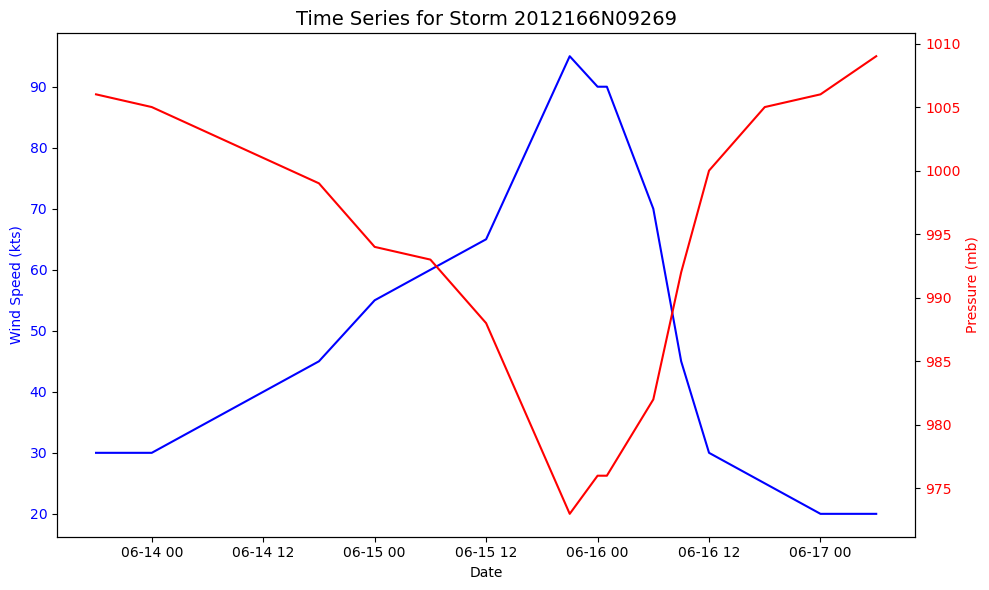

In [25]:
import matplotlib.pyplot as plt

# Create the figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the wind speed on the left y-axis
ax1.plot(filtered_dates, filtered_winds, color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Wind Speed (kts)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis to plot the pressure
ax2 = ax1.twinx()
ax2.plot(filtered_dates, filtered_pressures, color='red')
ax2.set_ylabel('Pressure (mb)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Improve layout and add a title
plt.title(f'Time Series for Storm {target_sid}', fontsize=14)
fig.tight_layout()

# Display the plot
plt.show()
